### Import packages

In [2225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from prettytable import PrettyTable

#### Import dataset

In [2226]:
df = pd.read_excel("full_cleaned_survey.xlsx")

In [2227]:
df.head()

,id,disability,employment_status,type_of_disability,disability_obtained,gender,race,age,urban_rural,level_of_education,household_income,duration_unemployed,previous_employment,q1_response,q1_themes,q2_response,q2_themes,assistive_tech
0,1,Yes,unemployed,Visual impairment,born,Male,African (Black),29,urban,secondary,0 - 5 000,6 months to 1 year,Yes,No,"[""NO""]",My eyesight,"[""DIS""]",No
1,2,Yes,unemployed,Visual impairment,born,Female,African (Black),27,rural,secondary,0 - 5 000,2 years to 2.5 years,No,Yes. The lack of awareness with regards to whi...,"[""LA""]",There are only a few employment opportunities ...,"[""ACC""]",No
2,3,Yes,unemployed,"Physical disability, Hearing impairment",born,Male,Indian,45,urban,diploma,15 001 - 20 000,4.5 years to 5 years,Yes,No,"[""NO""]",Being too old. Being discriminated against.,"[""DEMO"",""DISC""]",Yes
3,4,Yes,unemployed,Visual impairment,developed,Female,Caucasian (White),36,urban,secondary,5 001 - 10 000,1 year to 1.5 years,Yes,"Yes, it has made me where I want to be, but th...","[""RA""]",My disabilities and my age. Due I won't be com...,"[""ACC""]",Yes
4,5,Yes,unemployed,Physical disability,developed,Male,African (Black),25,rural,vocational,0 - 5 000,1 year to 1.5 years,No,Currently I'm in search of in-service training...,"[""AC""]",I feel that having one hand has brought diffic...,"[""DIS""]",No


### Data cleaning and verification

In [2228]:
df.dtypes

id                      int64
disability             object
employment_status      object
type_of_disability     object
disability_obtained    object
gender                 object
race                   object
age                     int64
urban_rural            object
level_of_education     object
household_income       object
duration_unemployed    object
previous_employment    object
q1_response            object
q1_themes              object
q2_response            object
q2_themes              object
assistive_tech         object
dtype: object

In [2229]:
df.nunique()

id                     118
disability               1
employment_status        2
type_of_disability       7
disability_obtained      2
gender                   2
race                     4
age                     31
urban_rural              2
level_of_education       8
household_income         8
duration_unemployed     17
previous_employment      2
q1_response            108
q1_themes               21
q2_response            118
q2_themes               24
assistive_tech           2
dtype: int64

In [2230]:
df.duration_unemployed.value_counts()

duration_unemployed
7.5 years to 8 years    23
6 months to 1 year      16
1.5 years to 2 years    10
1 year to 1.5 years      8
2 years to 2.5 years     8
5 years to 5.5 years     7
6 years to 6.5 years     6
3 years to 3.5 years     6
6.5 years to 7 years     6
2.5 years to 3 years     5
Less than 3 months       5
4 years to 4.5 years     5
7 years to 7.5 years     4
4.5 years to 5 years     3
3 to 6 months            3
3.5 years to 4 years     2
5.5 years to 6 years     1
Name: count, dtype: int64

Drop irrelevent columns for now

In [2231]:
df = df.drop(columns=["q1_response"])
df = df.drop(columns=["q2_response"])
df = df.drop(columns=["disability"])

In [2232]:
df["employment_status"].value_counts()

employment_status
unemployed    99
employed      19
Name: count, dtype: int64

In [2233]:
# Frequencies and percentages for categorical variables
categorical_cols = ['employment_status', 'type_of_disability', 
                   'disability_obtained', 'gender', 'race', 'urban_rural',
                   'level_of_education', 'household_income', 'duration_unemployed',
                   'previous_employment']

for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    freq_dist = df[col].value_counts()
    percentage_dist = df[col].value_counts(normalize=True) * 100
    stats_df = pd.DataFrame({
        'Frequency': freq_dist,
        'Percentage': percentage_dist
    })
    print(stats_df)


Frequency Distribution for employment_status:
                   Frequency  Percentage
employment_status                       
unemployed                99   83.898305
employed                  19   16.101695

Frequency Distribution for type_of_disability:
                                         Frequency  Percentage
type_of_disability                                            
Physical disability                             49   41.525424
Visual impairment                               40   33.898305
Hearing impairment                              12   10.169492
Mental health condition                          6    5.084746
Physical disability, Visual impairment           5    4.237288
Physical disability, Hearing impairment          3    2.542373
Epilepsy                                         3    2.542373

Frequency Distribution for disability_obtained:
                     Frequency  Percentage
disability_obtained                       
born                        62   52.542

## Employment status distribution

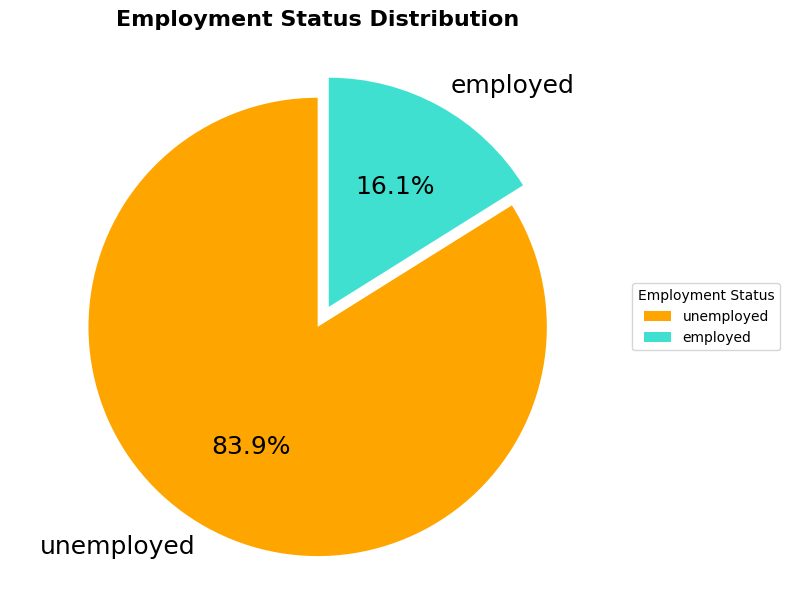

In [2234]:
# Calculate employment status percentages
employment_counts = df['employment_status'].value_counts(normalize=True) * 100

# Create the pie chart
colors = ['orange', 'turquoise'] # Green for employed, red for unemployed
explode = (0.1, 0) # Explode the 'unemployed' slice slightly for emphasis

fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figure size if needed
ax.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=90,
       colors=colors, explode=explode, textprops={'fontsize': 18})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title with improved styling
ax.set_title('Employment Status Distribution', fontsize=16, fontweight='bold', pad=20)


# Add a legend with a clear description
# Using a separate legend to avoid overlapping text
plt.legend(employment_counts.index, title='Employment Status', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Employment status by gender

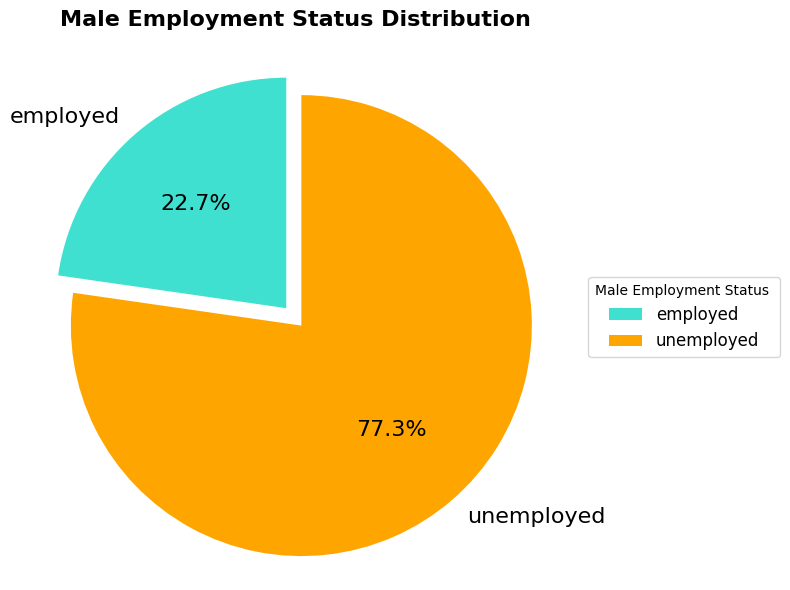

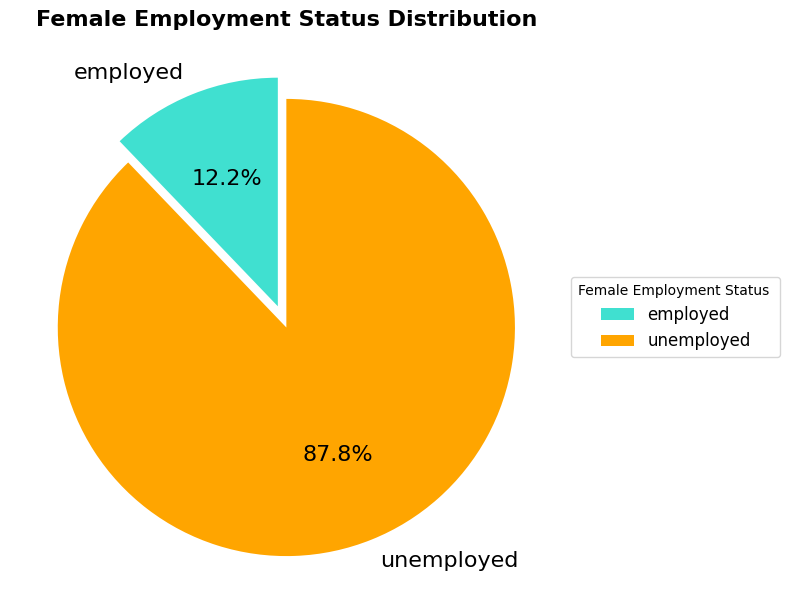

In [2235]:
# Function to create a styled pie chart
def create_pie_chart(data, title, colors, explode):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90,
           colors=colors, explode=explode, textprops={'fontsize': 16})
    ax.axis('equal')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    plt.legend(data.index, title=title.replace('Distribution', ''), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
    plt.tight_layout()
    plt.show()


# Gender by Employment Status
gender_employment = df.groupby('gender')['employment_status'].value_counts(normalize=True).unstack() * 100

# Create pie charts for each gender
colors = ['turquoise', 'orange']
explode_male = (0.1, 0)
explode_female = (0, 0.1)

create_pie_chart(gender_employment.loc['Male'], 'Male Employment Status Distribution', colors, explode_male)
create_pie_chart(gender_employment.loc['Female'], 'Female Employment Status Distribution', colors, explode_female)

## Race by employment status

In [2236]:
df["race"].value_counts(normalize='True')*100

race
African (Black)      67.796610
Caucasian (White)    17.796610
Coloured              9.322034
Indian                5.084746
Name: proportion, dtype: float64

none of the races other than african and caucasian had both unemployment and employment

In [2237]:
employment_by_race = df.groupby('race')['employment_status'].value_counts(normalize=True).mul(100).round(1).reset_index()
employment_by_race.columns = ['race', 'employment_status', 'percentage']

# Ensure consistency in the 'employment_status' column
employment_by_race['employment_status'] = employment_by_race['employment_status'].str.capitalize()

# Create the plotly bar chart
fig = px.bar(employment_by_race,
             x='race',
             y='percentage',
             color='employment_status',
             title='Employment Status by Population Group (%)',
             labels={'race': 'Population Group',
                    'percentage': 'Percentage (%)',
                    'employment_status': 'Employment Status'},
             text=employment_by_race['percentage'].apply(lambda x: f'{x:.1f}%'),
             color_discrete_map={
                 'Employed': 'turquoise',  # Ensure exact match
                 'Unemployed': 'orange'   # Ensure exact match
             })

# Customize the layout with increased font sizes
fig.update_layout(
    title_x=0.5,
    title_font_size=24,
    xaxis_tickangle=-0,
    bargap=0.2,
    height=600,
    width=1200,
    showlegend=True,
    legend_title_text='Employment Status',
    
    # Increase font sizes for all text
    font=dict(size=16),
    
    # Customize axis titles
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    
    # Customize legend
    legend_title_font_size=18,
    legend_font_size=16,
    
    # Customize tick labels
    xaxis_tickfont_size=17,
    yaxis_tickfont_size=16
)

# Update traces for larger text inside bars
fig.update_traces(
    textfont=dict(size=17),
    textposition='inside',
    hovertemplate='%{x}<br>%{text}<extra></extra>'
)

# Show the plot
fig.show()

# Print the percentages for reference
print("\nEmployment Status Percentages:")
print(df.groupby('race')['employment_status']
      .value_counts(normalize=True)
      .mul(100)
      .round(1)
      .unstack())



Employment Status Percentages:
employment_status  employed  unemployed
race                                   
African (Black)        18.8        81.2
Caucasian (White)      19.0        81.0
Coloured                NaN       100.0
Indian                  NaN       100.0


### Employment status by previous employment

In [2238]:
# Percentage by previous employment
employment_pevious_employment = df.groupby("previous_employment")["employment_status"].value_counts(normalize=True)*100
employment_pevious_employment

previous_employment  employment_status
No                   unemployed           87.500000
                     employed             12.500000
Yes                  unemployed           81.428571
                     employed             18.571429
Name: proportion, dtype: float64

In [2239]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['No Previous Employment', 'Has Previous Employment'],
    y=[87.5, 81.43],
    name='Unemployed',
    marker_color='#FFA500'
))

fig.add_trace(go.Bar(
    x=['No Previous Employment', 'Has Previous Employment'],
    y=[12.5, 18.57],
    name='Employed',
    marker_color='#40E0D0'
))

fig.update_layout(
    title={
        'text': 'Employment Status: Comparing Those With and Without Prior Experience',
        'font': {'size': 24},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title={
        'text': 'Were previously employed',
        'font': {'size': 18}
    },
    yaxis_title={
        'text': 'Percentage (%)',
        'font': {'size': 18}
    },
    legend_title={
        'text': 'Employment status',
        'font': {'size': 14}
    },
    font={'size': 14},
    barmode='group',
    showlegend=True,
    plot_bgcolor='white',
    width=1000,
    height=600
)

fig.update_yaxes(ticksuffix="%")
fig.update_traces(
    texttemplate='%{y:.1f}%', 
    textposition='outside',
    textfont={'size': 16}  # Increase size of bar labels
)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

In [2240]:
previously_employed_count = df["previous_employment"].value_counts(normalize=True)*100
previously_employed_count

previous_employment
Yes    59.322034
No     40.677966
Name: proportion, dtype: float64

In [2241]:
previously_employed_count = df["previous_employment"].value_counts(normalize=True)*100

fig = px.bar(x=previously_employed_count.index, 
            y=previously_employed_count.values,
            title='Previous Employment Distribution (%)',
            height=800,
            width=1000,
            text=previously_employed_count.round(1).astype(str) + '%')

fig.update_layout(
   title=dict(text='Previously Employed (%)', 
              x=0.5,
              font=dict(size=26, weight='bold')),
   font=dict(size=20),
   xaxis_title='',
   yaxis_title='Percentage'
)

fig.update_traces(
   textfont=dict(size=24),
   marker_color=['turquoise', 'orange'])

fig.show()

In [2242]:
# Calculate percentage
never_worked_unemployed = len(df[(df['employment_status'] == 'unemployed') & (df['previous_employment'] == 'No')])
total_respondents = len(df)

percentage = round((never_worked_unemployed / total_respondents * 100), 1)
print(f"Percentage of all respondents who are unemployed and never worked: {percentage}%")

Percentage of all respondents who are unemployed and never worked: 35.6%


In [2243]:
# Calculate values
unemployed_never = len(df[(df['employment_status'] == 'unemployed') & (df['previous_employment'] == 'No')])
unemployed_worked = len(df[(df['employment_status'] == 'unemployed') & (df['previous_employment'] == 'Yes')])
employed_never = len(df[(df['employment_status'] == 'employed') & (df['previous_employment'] == 'No')])
employed_worked = len(df[(df['employment_status'] == 'employed') & (df['previous_employment'] == 'Yes')])


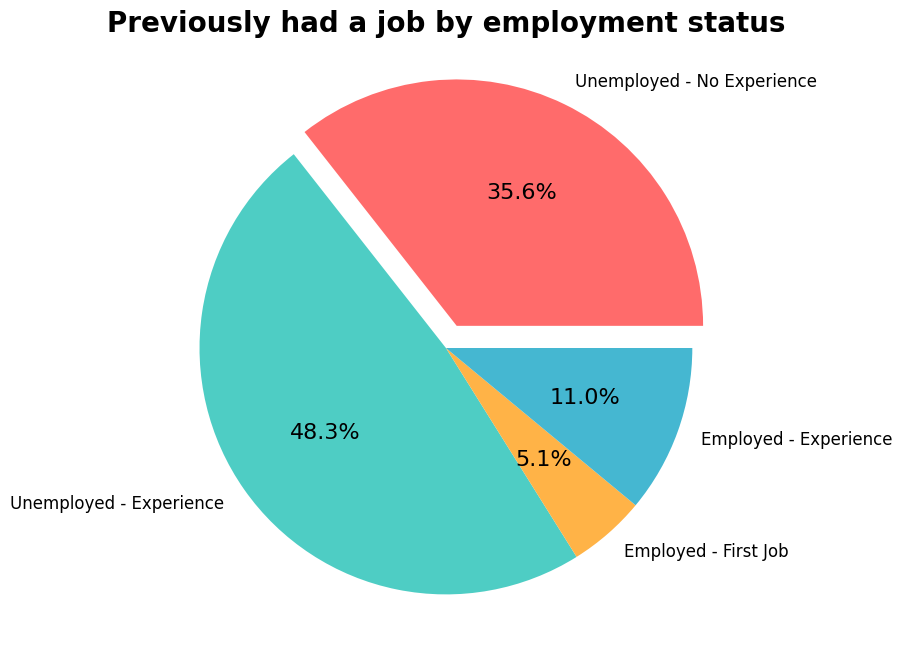

In [2244]:
values = [unemployed_never, unemployed_worked, employed_never, employed_worked]
labels = ['Unemployed - No Experience', 
          'Unemployed - Experience',
          'Employed - First Job',
          'Employed - Experience']

plt.figure(figsize=(12, 8))
explode = (0.1, 0, 0, 0)
colors = ['#FF6B6B', '#4ECDC4', '#FFB347', '#45B7D1']

patches, texts, autotexts = plt.pie(values, 
                                  labels=labels, 
                                  autopct='%1.1f%%',
                                  explode=explode,
                                  colors=colors)

# Set font size for labels and percentages
plt.setp(texts, size=12)
plt.setp(autotexts, size=16)

plt.title('Previously had a job by employment status', fontsize=20, fontweight='bold')
plt.show()

## Househld income distribution

In [2245]:
df.household_income.value_counts()

household_income
0 - 5 000          71
5 001 - 10 000     22
10 001 - 15 000    11
15 001 - 20 000     6
40 001 - 45 000     2
20 001 - 25 000     2
25 001 - 30 000     2
30 001 - 35 000     2
Name: count, dtype: int64

In [2246]:
# Calculate the percentage for each income bracket
income_counts = df['household_income'].value_counts(normalize=True) * 100

# Define the desired order of income brackets
income_order = [
    '0 - 5 000', '5 001 - 10 000', '10 001 - 15 000', '15 001 - 20 000',
    '20 001 - 25 000', '25 001 - 30 000', '30 001 - 35 000', '40 001 - 45 000'
]

# Reorder the income counts according to income_order
income_counts = income_counts.reindex(income_order)

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=income_counts.index,
    y=income_counts.values,
    text=[f'{value:.1f}%' for value in income_counts.values],  # Add percentage labels
    textposition='auto',  # Display text directly on the bars
    textfont=dict(
        size=16,  # Font size for percentages
        color="white",  # Font color
        family="Arial"  # Font family
    ),
    marker=dict(color='darkgreen'),
    width=0.6  # Adjust bar width
))

# Update layout with figure dimensions
fig.update_layout(
    title="Household Income Distribution",
    xaxis_title="Household Income Brackets",
    yaxis_title="Percentage of Respondents",
    xaxis=dict(tickangle=-0),  # Rotate x-axis labels
    margin=dict(l=50, r=50, t=50, b=100),  # Adjust margins
    template="plotly_white",
    font=dict(size=16),  # General font settings
    width=1300,  # Set figure width
    height=700  # Set figure height
)

fig.show()



In [2247]:
income_by_employment = pd.crosstab(
    index=df['household_income'], 
    columns=df['employment_status'],
    normalize='columns'
) * 100

# Reorder the income brackets if needed
income_by_employment = income_by_employment.reindex(income_order)

# Create the bar chart with plotly express
fig = px.bar(
    income_by_employment,
    barmode='group',
    color_discrete_sequence=['turquoise', 'orange'],
    labels={
        "index": "Household Income Brackets",
        "value": "Percentage within Employment Status",
        "employment_status": "Employment Status"
    },
    height=700,
    width=1300,
    text_auto='.1f'  # Automatically add text with 1 decimal place
)

# Update layout - center the title and keep the plot area grey
fig.update_layout(
    title=dict(
        text="Income Distribution by Employment Status",
        x=0.5,  
        font=dict(size=24)  
    ),
    xaxis_tickangle=0,
    paper_bgcolor='white',
    plot_bgcolor='rgba(233,233,233,1)', 
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        font=dict(size=14)
    ),
    font=dict(size=14)
)

# Make the percentage text inside bars bigger and white
fig.update_traces(
    textfont=dict(
        color="white",
        size=16  # Larger text size for percentages
    ), 
    textposition="inside", 
    textangle=0
)

# Show the plot
fig.show()

In [2248]:

# For Employed People
employed_pct = (df[df['employment_status'] == 'employed']['household_income']
                .value_counts(normalize=True) * 100)

# Create plot for Employed
fig = px.bar(x=employed_pct.index, 
             y=employed_pct.values,
             title='Income Distribution of Employed People (%)',
             text=employed_pct.round(1).astype(str) + '%',
             height=700,
             labels={'x': '', 'y': ''})

fig.update_layout(
    xaxis_tickangle=-45,
    font=dict(size=14),
    title_x=0.5
)

fig.show()

# For Unemployed People
unemployed_pct = (df[df['employment_status'] == 'unemployed']['household_income']
                   .value_counts(normalize=True) * 100)

# Create plot for Unemployed with red bars
fig = px.bar(x=unemployed_pct.index, 
             y=unemployed_pct.values,
             title='Income Distribution of Unemployed People (%)',
             text=unemployed_pct.round(1).astype(str) + '%',
             height=700,
             labels={'x': '', 'y': ''},
             color_discrete_sequence=['red'])  # Make bars red

fig.update_layout(
    xaxis_tickangle=-45,
    font=dict(size=14),
    title_x=0.5
)

fig.show()

## income averages
The mid points were taken to use to calculate averages

In [2249]:
# Create dictionary with midpoints for each bracket
income_midpoints = {
    '0 - 5 000': 2500,
    '5 001 - 10 000': 7500,
    '10 001 - 15 000': 12500,
    '15 001 - 20 000': 17500,
    '20 001 - 25 000': 22500,
    '25 001 - 30 000': 27500,
    '30 001 - 35 000': 32500,
    '40 001 - 45 000': 42500
}

# Create midpoint column
df['income_midpoint'] = df['household_income'].map(income_midpoints)

# Calculate average for each employment status
average_by_status = df.groupby('employment_status')['income_midpoint'].agg([
    ('average_income', 'mean'),
    ('count', 'count')
])

# Convert to Rands and format
average_by_status['average_income'] = average_by_status['average_income'].apply(lambda x: f'R {x:,.2f}')

print("\nAverage Monthly Household Income by Employment Status:")
print(average_by_status)


Average Monthly Household Income by Employment Status:
                  average_income  count
employment_status                      
employed             R 10,921.05     19
unemployed            R 6,338.38     99


In [2250]:
# Create midpoint column
df['income_midpoint'] = df['household_income'].map(income_midpoints)

# Calculate average for each employment status
average_by_status = df.groupby('employment_status')['income_midpoint'].mean().round(2)

# Create text labels
text_labels = [f'R {x:,.2f}' for x in average_by_status.values]

# Create bar chart
fig = px.bar(x=average_by_status.index, 
             y=average_by_status.values,
             title='Average Monthly Household Income by Employment Status',
             height=700,
             width=1200,
             labels={'x': '', 'y': 'Rands'},
             text=text_labels)

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=15),
    title_font_size=20
)

# Different colors for employed/unemployed
fig.update_traces(marker_color=['blue', 'red'])

fig.show()

## income by gender

In [2251]:
# Define the correct order of income brackets with shortened format
income_order = [
    '0-5k',
    '5k-10k',
    '10k-15k',
    '15k-20k',
    '20k-25k',
    '25k-30k',
    '30k-35k',
    '40k-45k'
]

# First, create the mapping for old to new values
income_mapping = {
    '0 - 5 000': '0-5k',
    '5 001 - 10 000': '5k-10k',
    '10 001 - 15 000': '10k-15k',
    '15 001 - 20 000': '15k-20k',
    '20 001 - 25 000': '20k-25k',
    '25 001 - 30 000': '25k-30k',
    '30 001 - 35 000': '30k-35k',
    '40 001 - 45 000': '40k-45k'
}

# Replace the values in your original dataframe
df['household_income'] = df['household_income'].replace(income_mapping)

# Now create the grouped dataframe
df_grouped_gender = df.groupby(['gender', 'employment_status', 'household_income']).size().reset_index()
df_grouped_gender.columns = ['gender', 'employment_status', 'household_income', 'count']

# Calculate percentages within each gender-employment status combination
df_grouped_gender['percentage'] = df_grouped_gender.groupby(['gender', 'employment_status'])['count'].transform(lambda x: x / x.sum() * 100)

# Create the bar plot
fig = px.bar(
    df_grouped_gender,
    x='household_income',
    y='percentage',
    color='employment_status',
    facet_col='gender',
    title='Income Distribution by Gender and Employment Status (%)',
    height=700,
    width=1600,
    text=df_grouped_gender['percentage'].round(1).astype(str) + '%',
    category_orders={'household_income': income_order},
    labels={'household_income': 'Household Income'}  # Renaming the axis label
)

# Update layout and position the legend at the top-right corner
fig.update_layout(
    title_x=0.5,
    font=dict(size=15),
    title_font_size=24,
    xaxis_tickangle=-0,
    showlegend=True,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        font=dict(size=14)  # Larger legend text
    ),
)

# Update color of bars for employed and unemployed categories
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet annotations (e.g., gender labels)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].title()))

fig.show()

### Income by race

In [2252]:
# Replace 'gender' with 'race' in the groupby operation and facet column
df_grouped_race = df.groupby(['race', 'employment_status', 'household_income']).size().reset_index()
df_grouped_race.columns = ['race', 'employment_status', 'household_income', 'count']

# Calculate percentages within each race-employment status combination
df_grouped_race['percentage'] = df_grouped_race.groupby(['race', 'employment_status'])['count'].transform(lambda x: x / x.sum() * 100)

# Create the bar chart with race as the facet column, but arranged in a 2x2 grid
fig = px.bar(df_grouped_race,
             x='household_income',
             y='percentage',
             color='employment_status',
             facet_col='race',  
             facet_col_wrap=2,  # Wrap facets into 2 columns (creates 2x2 grid)
             title='Income Distribution by Race and Employment Status (%)',
             height=900,  # Increase height for better spacing
             width=1500,  # Adjust width
             text=df_grouped_race['percentage'].round(1).astype(str) + '%',
             category_orders={'household_income': income_order},
             labels={'household_income': 'Household Income'})  

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=13),
    title_font_size=25,
    showlegend=True,
    barmode='group',
    legend_title='Employment Status',
    
    # Position the legend in the top-right corner
    legend=dict(
        x=1,  # Horizontal position (1 is the far right)
        y=1,  # Vertical position (1 is the top)
        xanchor='right',  # Anchor legend to the right horizontally
        yanchor='top',    # Anchor legend to the top vertically
        bgcolor='rgba(255, 255, 255, 0.5)'  # Optional: Add a transparent background to the legend for better visibility
    )
)

# Update colors of bars
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet labels to just show the race name
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].title()))

fig.show()




In [2253]:
# Read data
df = pd.read_excel('full_cleaned_survey.xlsx')

# Create midpoint column
df['income_midpoint'] = df['household_income'].map(income_midpoints)

# Calculate average for each gender and employment status combination
average_by_gender_emp = df.groupby(['gender', 'employment_status'])['income_midpoint'].mean().round(2).reset_index()

# Create bar chart
fig = px.bar(average_by_gender_emp, 
             x='gender',
             y='income_midpoint',
             color='employment_status',
             title='Average Monthly Household Income by Gender and Employment Status',
             height=700,
             width=1300,
             labels={'x': '', 'y': 'Rands', 'income_midpoint': 'Average Income'},
             text=[f'R {x:,.2f}' for x in average_by_gender_emp['income_midpoint']])

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=18),
    title_font_size=24,
    barmode='group',
    legend_title='Employment Status'
)

# Update colors (blue for employed, red for unemployed)
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

fig.show()

# Print the averages
print("\nAverage Monthly Household Income by Gender and Employment Status:")
print(average_by_gender_emp.round(2))


Average Monthly Household Income by Gender and Employment Status:
   gender employment_status  income_midpoint
0  Female          employed          9166.67
1  Female        unemployed          6269.23
2    Male          employed         12500.00
3    Male        unemployed          6470.59


## household income by race and employment

In [2254]:
# Calculate average for each race
average_by_race = df.groupby('race')['income_midpoint'].mean().round(2)

# Create text labels
text_labels = [f'R {x:,.2f}' for x in average_by_race.values]

# Create bar chart
fig = px.bar(x=average_by_race.index, 
            y=average_by_race.values,
            title='Average Monthly Household Income by Race',
            height=700,
            width=1300,
            labels={'x': '', 'y': 'Rands'},
            text=text_labels)

# Update layout
fig.update_layout(
   title_x=0.5,
   font=dict(size=16),
   title_font_size=20
)

fig.show()

# Print the averages
print("\nAverage Monthly Household Income by Race:")
print(average_by_race)


Average Monthly Household Income by Race:
race
African (Black)       4812.50
Caucasian (White)    13690.48
Coloured              6590.91
Indian               15000.00
Name: income_midpoint, dtype: float64


In [2255]:
# Calculate average for each race and employment status combination
average_by_race_emp = df.groupby(['race', 'employment_status'])['income_midpoint'].mean().round(2).reset_index()

# Create bar chart
fig = px.bar(average_by_race_emp, 
             x='race',  # Change 'gender' to 'race'
             y='income_midpoint',
             color='employment_status',
             title='Average Monthly Household Income by Race and Employment Status',
             height=700,
             width=1400,
             labels={'x': '', 'y': 'Rands', 'income_midpoint': 'Average Income'},
             text=[f'R {x:,.2f}' for x in average_by_race_emp['income_midpoint']])

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=16),
    title_font_size=24,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        x=0.9,  # Position the legend to the right, but inside the plot
        y=1,    # Position the legend at the top
        traceorder='normal',
        orientation='v',  # Set legend items to be stacked vertically
        xanchor='right',   # Align legend to the left of the box
        yanchor='top'     # Align legend to the top of the box
    )
)

# Update colors (blue for employed, red for unemployed)
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

fig.show()

# Print the averages
print("\nAverage Monthly Household Income by Race and Employment Status:")
print(average_by_race_emp.round(2))




Average Monthly Household Income by Race and Employment Status:
                race employment_status  income_midpoint
0    African (Black)          employed          7833.33
1    African (Black)        unemployed          4115.38
2  Caucasian (White)          employed         22500.00
3  Caucasian (White)        unemployed         11617.65
4           Coloured        unemployed          6590.91
5             Indian        unemployed         15000.00


## Education level

In [2256]:
education_employment_status = df.groupby("employment_status")["level_of_education"].value_counts(normalize=True) * 100
education_employment_status

employment_status  level_of_education 
employed           secondary              47.368421
                   diploma                15.789474
                   vocational             15.789474
                   undergraduate          10.526316
                   honours                 5.263158
                   masters                 5.263158
unemployed         secondary              41.414141
                   undergraduate          17.171717
                   masters                14.141414
                   vocational              9.090909
                   diploma                 7.070707
                   honours                 5.050505
                   no formal education     4.040404
                   phd                     2.020202
Name: proportion, dtype: float64

In [2257]:
education_level_pct = df.level_of_education.value_counts(normalize=True) * 100
education_level_pct

level_of_education
secondary              42.372881
undergraduate          16.101695
masters                12.711864
vocational             10.169492
diploma                 8.474576
honours                 5.084746
no formal education     3.389831
phd                     1.694915
Name: proportion, dtype: float64

In [2258]:
## Define the custom order for the education levels
custom_order = ['no formal education', 'primary', 'secondary', 'vocational', 'diploma', 'undergraduate', 'honours', 'masters', 'phd']

# Reindex the data to match the custom order
education_level_pct = education_level_pct.reindex(custom_order)

# Create the Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=education_level_pct.index,
    y=education_level_pct.values,
    text=education_level_pct.values.round(1),
    textposition='auto',
    textfont=dict(size=16),
    marker=dict(color='teal')
)])

# Update layout to fit labels and center the title
fig.update_layout(
    title=dict(
        text='Percentage Distribution of Education Levels',
        x=0.5,
        font=dict(size=22, family='Arial', color='black')
    ),
    xaxis=dict(
        title='Level of Education',
        categoryorder='array',
        categoryarray=custom_order,
        tickangle=0,
        tickfont=dict(size=12),
    ),
    yaxis=dict(
        title_text="Percentage",
        ticksuffix="%"
    ),
    font=dict(size=12),
    width=1100,
    height=600,
    margin=dict(l=40, r=40, t=80, b=100),
    plot_bgcolor='rgba(245, 245, 245, 1)'
)

fig.show()


### Education by employment status

In [2259]:
colors = {'employed': 'turquoise', 'unemployed': 'orange'} 

fig = go.Figure() 

for employment_status in education_employment_status.index.levels[0]:    
    employment_status_clean = employment_status.strip().lower()    
    subset = education_employment_status[employment_status]        
    
    fig.add_trace(go.Bar(        
        x=subset.index,        
        y=subset.values,        
        name=employment_status,        
        text=subset.values.round(1),        
        textposition='auto',        
        textfont=dict(size=14),  # Increased from 12 to 16        
        marker_color=colors[employment_status_clean]    
    )) 

fig.update_layout(    
    title=dict(        
        text='Education Level by Employment Status',        
        x=0.5,        
        font=dict(size=24)    
    ),    
    height=700,    
    width=1300,    
    xaxis_title='Level of Education',    
    yaxis_title='Percentage',    
    xaxis=dict(        
        categoryorder='array',        
        categoryarray=custom_order,        
        tickfont=dict(size=13)    
    ),    
    yaxis=dict(        
        title_text="Percentage",         
        ticksuffix=" %",        
        tickfont=dict(size=13)    
    ),    
    barmode='group',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        font=dict(size=14)  # Larger legend text like we did before
    ),
    font=dict(size=14)
)

fig.show()

### Education by Gender

In [2260]:
# Calculate the percentage for each combination of education level and gender
education_gender = df.groupby('gender')['level_of_education'].value_counts(normalize=True) * 100

# Create the Plotly bar chart
fig = go.Figure()

# Custom colors - using turquoise and orange like your previous graphs
colors = {'Female': '#2ecc71', 'Male': '#9b59b6'}

# Define custom order
custom_order = ['no formal education', 'primary', 'secondary', 'vocational', 'diploma', 'undergraduate', 'honours', 'masters', 'phd']

for gender in education_gender.index.levels[0]:
   subset = education_gender[gender]
   # Reindex the subset according to custom order
   subset = subset.reindex(custom_order)
   
   fig.add_trace(go.Bar(
       x=subset.index,
       y=subset.values,
       name=gender,
       text=[f"{x:.1f}%" for x in subset.values],
       textposition='auto',
       marker_color=colors[gender],
       textfont=dict(size=14)
   ))

fig.update_layout(
   title={
       'text': 'Level of Education by Gender',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top',
       'font': dict(size=24)
   },
   xaxis_title='Level of Education',
   yaxis_title='Percentage',
   xaxis=dict(
       categoryorder='array',  # Use array for custom ordering
       categoryarray=custom_order  # Specify the custom order
   ),
   yaxis=dict(
       title_text="Percentage",
       ticksuffix="%"
   ),
   barmode='group',
   height=700,
   width=1400
)

fig.show()

In [2261]:
# Create education level order (from lowest to highest)
education_order = [
   'no formal education',
   'secondary',
   'vocational', 
   'diploma',
   'undergraduate',
   'honours',
   'masters',
   'phd'
]

# Create the grouped dataframe
df_grouped_edu = df.groupby(['gender', 'employment_status', 'level_of_education']).size().reset_index()
df_grouped_edu.columns = ['gender', 'employment_status', 'level_of_education', 'count']

# Calculate percentages within each gender-employment status combination
df_grouped_edu['percentage'] = df_grouped_edu.groupby(['gender', 'employment_status'])['count'].transform(lambda x: x/x.sum() * 100)

# Create bar chart
fig = px.bar(df_grouped_edu,
            x='level_of_education',
            y='percentage',
            color='employment_status',
            facet_col='gender',
            title='Education Distribution by Gender and Employment Status (%)',
            height=750,
            width=1600,
            text=df_grouped_edu['percentage'].round(1).astype(str) + '%',
            category_orders={'level_of_education': education_order},
            labels={'level_of_education': 'Level of Education'})

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=15),
    title_font_size=24,
    showlegend=True,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor="rgba(255, 255, 255, 0.8)"  # Semi-transparent white background
    )
)

# Update color of bars
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet labels to just show "Female" and "Male"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].title()))

fig.show()

### Education by race

In [2262]:
# Calculate the percentage for each combination of race and education level
race_education_status = df.groupby("race")["level_of_education"].value_counts(normalize=True).unstack() * 100

# Reorder columns based on the specified order
race_education_status = race_education_status.reindex(columns=education_order, fill_value=0)

# Create the Plotly bar chart
fig = go.Figure()

# Add traces only once for each race group
for race in race_education_status.index:
    subset = race_education_status.loc[race]
    
    # Check if race is already added to the trace
    fig.add_trace(go.Bar(
        x=subset.index,
        y=subset.values,
        name=race,
        text=subset.values.round(1).astype(str) + '%',
        textposition='auto',
        textfont=dict(size=16)  # Set the font size for text on bars
    ))

# Update the layout with title, axes, font sizes, and legend
fig.update_layout(
    title_x=0.5,
    title=dict(
        text='Education Level by Race',
        font=dict(size=24)  # Title font size
    ),
    xaxis_title='Level of Education',
    yaxis_title='Percentage',
    xaxis=dict(
        categoryorder='array',
        categoryarray=education_order,
        title_font=dict(size=18),  # X-axis title font size
        tickfont=dict(size=14)  # X-axis label font size
    ),
    yaxis=dict(
        title_text="Percentage",
        ticksuffix="%",
        title_font=dict(size=18),  # Y-axis title font size
        tickfont=dict(size=14)  # Y-axis label font size
    ),
    width=1300,  # Width of the figure
    height=700,  # Height of the figure
    font=dict(size=16),  # General font size for the entire chart
    barmode='group',  # Display bars side-by-side
    legend=dict(
        x=1,  # Move legend to the right
        y=1,  # Move legend to the top
        font=dict(size=14),
        xanchor="right",  # Anchor legend to the right
        yanchor="top",  # Anchor legend to the top
        bgcolor="rgba(255,255,255,0.7)",  # Optional: Add a semi-transparent background
        bordercolor="black",  # Optional: Add a border
        borderwidth=1,  # Optional: Set border width
    )
)

fig.show()


In [2263]:
df.groupby("level_of_education")["employment_status"].value_counts()

level_of_education   employment_status
diploma              unemployed            7
                     employed              3
honours              unemployed            5
                     employed              1
masters              unemployed           14
                     employed              1
no formal education  unemployed            4
phd                  unemployed            2
secondary            unemployed           41
                     employed              9
undergraduate        unemployed           17
                     employed              2
vocational           unemployed            9
                     employed              3
Name: count, dtype: int64

In [2264]:
# Create the grouped dataframe
df_edu_race = df.groupby(['race', 'employment_status', 'level_of_education']).size().reset_index()
df_edu_race.columns = ['race', 'employment_status', 'level_of_education', 'count']

# Calculate percentages within each race-employment status combination
df_edu_race['percentage'] = df_edu_race.groupby(['race', 'employment_status'])['count'].transform(lambda x: x / x.sum() * 100)

# Create bar chart
fig = px.bar(df_edu_race,
            x='level_of_education',
            y='percentage',
            color='employment_status',
            facet_col='race',
            facet_col_wrap=2,  # Arrange facets in a 2x2 layout
            title='Education Distribution by Race and Employment Status (%)',
            height=900,  # Increase height for better spacing
            width=1500,
            text=df_edu_race['percentage'].round(1).astype(str) + '%',
            category_orders={'level_of_education': education_order},
            labels={'level_of_education': 'Level of Education'})

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=15),
    title_font_size=24,
    showlegend=True,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        x=1,  # Align to the right
        y=1,  # Move to the top
        xanchor="right",  # Anchor to the right
        yanchor="top",  # Anchor to the top
        bgcolor="rgba(255, 255, 255, 0.8)"  # Optional: semi-transparent white background
    )
)

# Update color of bars
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet labels to show only race names
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].title()))

fig.show()



## Duration unemployed

In [2265]:
df.duration_unemployed.value_counts()

duration_unemployed
7.5 years to 8 years    23
6 months to 1 year      16
1.5 years to 2 years    10
1 year to 1.5 years      8
2 years to 2.5 years     8
5 years to 5.5 years     7
6 years to 6.5 years     6
3 years to 3.5 years     6
6.5 years to 7 years     6
2.5 years to 3 years     5
Less than 3 months       5
4 years to 4.5 years     5
7 years to 7.5 years     4
4.5 years to 5 years     3
3 to 6 months            3
3.5 years to 4 years     2
5.5 years to 6 years     1
Name: count, dtype: int64

In [2266]:
df.duration_unemployed.value_counts(normalize=True)*100

duration_unemployed
7.5 years to 8 years    19.491525
6 months to 1 year      13.559322
1.5 years to 2 years     8.474576
1 year to 1.5 years      6.779661
2 years to 2.5 years     6.779661
5 years to 5.5 years     5.932203
6 years to 6.5 years     5.084746
3 years to 3.5 years     5.084746
6.5 years to 7 years     5.084746
2.5 years to 3 years     4.237288
Less than 3 months       4.237288
4 years to 4.5 years     4.237288
7 years to 7.5 years     3.389831
4.5 years to 5 years     2.542373
3 to 6 months            2.542373
3.5 years to 4 years     1.694915
5.5 years to 6 years     0.847458
Name: proportion, dtype: float64

Group it in years instead of 6 months

In [2267]:
# Function to categorize duration into logical groups
def simplify_duration(duration):
    if duration in ['Less than 3 months', '3 to 6 months', '6 months to 1 year']:
        return '0-1 years'
    elif duration in ['1 year to 1.5 years', '1.5 years to 2 years']:
        return '1-2 years'
    elif duration in ['2 years to 2.5 years', '2.5 years to 3 years']:
        return '2-3 years'
    elif duration in ['3 years to 3.5 years', '3.5 years to 4 years']:
        return '3-4 years'
    elif duration in ['4 years to 4.5 years', '4.5 years to 5 years']:
        return '4-5 years'
    elif duration in ['5 years to 5.5 years', '5.5 years to 6 years']:
        return '5-6 years'
    elif duration in ['6 years to 6.5 years', '6.5 years to 7 years']:
        return '6-7 years'
    elif duration in ['7 years to 7.5 years', '7.5 years to 8 years']:
        return '7-8 years'
    else:
        print(duration)
        return 'Other'

# Create new column with simplified categories
df['duration_simplified'] = df['duration_unemployed'].apply(simplify_duration)

# Calculate percentages
duration_counts = df['duration_simplified'].value_counts()
duration_pct = (duration_counts / duration_counts.sum() * 100).round(1)

# Define logical order
simplified_order = [
    '0-1 years',
    '1-2 years',
    '2-3 years',
    '3-4 years',
    '4-5 years',
    '5-6 years',
    '6-7 years',
    '7-8 years',
]

# Create bar chart
fig = px.bar(x=duration_pct.reindex(simplified_order).index, 
             y=duration_pct.reindex(simplified_order).values,
             title='Duration of Unemployment (%)',
             height=700,
             width=1300,
             labels={'x': '', 'y': 'Percentage'},
             text=duration_pct.reindex(simplified_order).values.round(1).astype(str) + '%')

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=19),
    title_font_size=24,
    xaxis_tickangle=-0,
    showlegend=False
)

# Update bar color
fig.update_traces(marker_color='red')

fig.show()

### Duration by Gender

In [2268]:
df["duration_simplified"].value_counts()

duration_simplified
7-8 years    27
0-1 years    24
1-2 years    18
2-3 years    13
6-7 years    12
4-5 years     8
3-4 years     8
5-6 years     8
Name: count, dtype: int64

In [2269]:
# Get percentage of each duration for each gender
df_gender_duration = (df.groupby('gender')['duration_simplified']
            .value_counts(normalize=True)
            .mul(100)
            .reset_index(name='percentage'))

# Create bar chart 
fig = px.bar(df_gender_duration, 
             x='duration_simplified',
             y='percentage',
             color='gender',
             title='Duration of Unemployment by Gender (%)',
             height=800,
             width=1400,
             text=df_gender_duration['percentage'].round(1).astype(str) + '%',
             category_orders={'duration_simplified': simplified_order},
             labels={'x': '', 'y': 'Percentage'})

fig.update_layout(
    title_x=0.5,
    font=dict(size=13),
    title_font_size=20,
    xaxis_tickangle=-0,
    barmode='group'
)

fig.show()


### Duration by race

In [2270]:
# Get percentage of each duration for each race
df_race = (df.groupby('race')['duration_simplified']
           .value_counts(normalize=True)
           .mul(100)
           .reset_index(name='percentage'))

# Create bar chart 
fig = px.bar(df_race, 
            x='duration_simplified',
            y='percentage',
            color='race',
            title='Duration of Unemployment by Race (%)',
            height=800,
            width=1200,
            text=df_race['percentage'].round(1).astype(str) + '%',
            category_orders={'duration_simplified': simplified_order},
            labels={'x': '', 'y': 'Percentage'})

fig.update_layout(
   title_x=0.5,
   font=dict(size=14),
   title_font_size=20,
   xaxis_tickangle=-45,
   barmode='group'
)

fig.show()

#### duration of unemployment by age
It will not be included, does not make sense as older will ofcourse wait long

In [2271]:
# First create age groups
def categorize_age(age):
   if age < 25:
       return '18-24'
   elif age < 35:
       return '25-34'
   elif age < 45:
       return '35-44'
   elif age < 55:
       return '45-54'
   else:
       return '55+'



## Age
age to employment status and

age to income

age to average income

In [2272]:
df['age_group'] = df['age'].apply(categorize_age)  

# Get percentage of each employment status for each age group
df_age = (df.groupby('age_group')['employment_status']
            .value_counts(normalize=True)
            .mul(100)
            .reset_index(name='percentage'))  

fig = px.bar(df_age,              
             x='age_group',             
             y='percentage',             
             color='employment_status',  
             title='Employment Status by Age Group (%)',             
             height=600,             
             width=1100,             
             text=df_age['percentage'].round(1).astype(str) + '%',             
             category_orders={'age_group': ['18-24', '25-34', '35-44', '45-54', '55+']},             
             labels={'age_group': 'Age Groups', 'employment_status': 'Employment Status', 'percentage': 'Percentage'},
             color_discrete_map={'Employed': 'turquoise', 'Unemployed': 'orange', 
                                 'employed': 'turquoise', 'unemployed': 'orange'}  
)   

fig.update_layout(    
    title_x=0.5,    
    font=dict(size=15),    
    title_font_size=24,    
    xaxis_tickangle=0,
    barmode='group',
    legend_title_text='Employment Status',  # Custom legend title
    legend=dict(  
        x=1,  # Move legend inside the graph (right side)
        y=1,  # Align legend to the top
        xanchor='right',  
        yanchor='top',  
        bgcolor='rgba(255,255,255,0.7)'  # Add slight background to improve readability
    )
)  

fig.show()



In [2273]:
# Replace household income values
df['household_income'] = df['household_income'].replace(income_mapping)

# Group data by age_group, employment_status, and household_income
df_grouped_age = df.groupby(['age_group', 'employment_status', 'household_income']).size().reset_index()
df_grouped_age.columns = ['age_group', 'employment_status', 'household_income', 'count']

# Calculate percentages within each age-employment status combination
df_grouped_age['percentage'] = df_grouped_age.groupby(['age_group', 'employment_status'])['count'].transform(lambda x: x / x.sum() * 100)

# Create the bar chart
fig = px.bar(df_grouped_age,
             x='household_income',
             y='percentage',
             color='employment_status',
             facet_col='age_group',  # Change from 'gender' to 'age_group'
             title='Income Distribution by Age Group and Employment Status (%)',
             height=700,
             width=1600,
             text=df_grouped_age['percentage'].round(1).astype(str) + '%',
             category_orders={'household_income': income_order},
             labels={'household_income': 'Household Income'})  

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=15),
    title_font_size=24,
    xaxis_tickangle=0,  # Keep labels readable
    showlegend=True,
    barmode='group',
    legend_title='Employment Status'
)

# Update color of bars
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet labels to just show the age groups
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  

fig.show()

In [2274]:
# Group data by age group and employment status, then calculate the average income
average_by_age_emp = df.groupby(['age_group', 'employment_status'])['income_midpoint'].mean().round(2).reset_index()

# Create bar chart
fig = px.bar(average_by_age_emp, 
             x='age_group',
             y='income_midpoint',
             color='employment_status',
             title='Average Monthly Household Income by Age Group and Employment Status',
             height=700,
             width=1400,
             labels={'age_group': 'Age Groups', 'income_midpoint': 'Average Income', 'employment_status': 'Employment Status'},
             text=[f'R {x:,.2f}' for x in average_by_age_emp['income_midpoint']])

# Update layout for positioning the legend inside the plot
fig.update_layout(
    title_x=0.5,
    font=dict(size=13),
    title_font_size=24,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        x=1,  # Move legend inside the graph (right side)
        y=1,  # Align legend to the top
        xanchor='right',  
        yanchor='top',
        bgcolor="rgba(255, 255, 255, 0.7)",  # Semi-transparent white background
        bordercolor="black",
        borderwidth=1
    )
)

# Update colors (blue for employed, red for unemployed)
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

fig.show()

# Print the averages
print("\nAverage Monthly Household Income by Age Group and Employment Status:")
print(average_by_age_emp)





Average Monthly Household Income by Age Group and Employment Status:
  age_group employment_status  income_midpoint
0     18-24          employed         12500.00
1     18-24        unemployed          3928.57
2     25-34          employed         11250.00
3     25-34        unemployed          7061.40
4     35-44          employed          4500.00
5     35-44        unemployed          5431.03
6     45-54          employed         16250.00
7     45-54        unemployed          7500.00
8       55+          employed         17500.00
9       55+        unemployed          5000.00


## Urban/Rural

In [2275]:
# Get percentage of each employment status for each urban/rural category
df_urban_rural = (df.groupby('urban_rural')['employment_status']
                   .value_counts(normalize=True)
                   .mul(100)
                   .reset_index(name='percentage'))

# Create bar chart
fig = px.bar(df_urban_rural,              
             x='urban_rural',              
             y='percentage',              
             color='employment_status',  
             title='Employment Status by Urban and Rural (%)',             
             height=600,              
             width=1100,              
             text=df_urban_rural['percentage'].round(1).astype(str) + '%',             
             category_orders={'urban_rural': ['Urban', 'Rural']},  # Adjust according to your data
             labels={'urban_rural': 'Urban vs Rural', 'employment_status': 'Employment Status', 'percentage': 'Percentage'},
             color_discrete_map={'Employed': 'turquoise', 'Unemployed': 'orange', 
                                 'employed': 'turquoise', 'unemployed': 'orange'}  
)

# Update layout for better presentation
fig.update_layout(    
    title_x=0.5,    
    font=dict(size=15),    
    title_font_size=24,    
    xaxis_tickangle=0,
    barmode='group',
    legend_title_text='Employment Status',  # Custom legend title
    legend=dict(  
        x=1,  # Move legend inside the graph (right side)
        y=1,  # Align legend to the top
        xanchor='right',  
        yanchor='top',  
        bgcolor='rgba(255,255,255,0.7)'  # Add slight background to improve readability
    )
)

fig.show()


### Income by location

In [2276]:
# Replace household income values
df['household_income'] = df['household_income'].replace(income_mapping)

# Group data by urban_rural, employment_status, and household_income
df_grouped_urban_rural = df.groupby(['urban_rural', 'employment_status', 'household_income']).size().reset_index()
df_grouped_urban_rural.columns = ['urban_rural', 'employment_status', 'household_income', 'count']

# Calculate percentages within each urban_rural-employment status combination
df_grouped_urban_rural['percentage'] = df_grouped_urban_rural.groupby(['urban_rural', 'employment_status'])['count'].transform(lambda x: x / x.sum() * 100)

# Create the bar chart
fig = px.bar(df_grouped_urban_rural,
             x='household_income',
             y='percentage',
             color='employment_status',
             facet_col='urban_rural',  # Change from 'age_group' to 'urban_rural'
             title='Income Distribution by Urban vs Rural and Employment Status (%)',
             height=700,
             width=1500,
             text=df_grouped_urban_rural['percentage'].round(1).astype(str) + '%',
             category_orders={'household_income': income_order},
             labels={'household_income': 'Household Income'})  

# Update layout for positioning the legend
fig.update_layout(
    title_x=0.5,
    font=dict(size=15),
    title_font_size=24,
    xaxis_tickangle=0,  # Keep labels readable
    showlegend=True,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        x=1,  # Move legend inside the graph (right side)
        y=1,  # Align legend to the top
        xanchor='right',  # Align legend to the right edge
        yanchor='top',  # Align legend to the top edge
        bgcolor='rgba(255,255,255,0.7)'  # Optional: add slight background to improve readability
    )
)

# Update color of bars
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet labels to just show the urban/rural categories
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  

fig.show()


In [2277]:
# Group data by urban_rural and employment_status, and calculate the average income midpoint
average_by_urban_rural_emp = df.groupby(['urban_rural', 'employment_status'])['income_midpoint'].mean().round(2).reset_index()

# Create bar chart
fig = px.bar(average_by_urban_rural_emp, 
             x='urban_rural',
             y='income_midpoint',
             color='employment_status',
             title='Average Monthly Household Income by Urban vs Rural and Employment Status',
             height=700,
             width=1200,
             labels={'urban_rural': 'Urban vs Rural', 'income_midpoint': 'Average Income', 'employment_status': 'Employment Status'},
             text=[f'R {x:,.2f}' for x in average_by_urban_rural_emp['income_midpoint']])

# Update layout for positioning the legend
fig.update_layout(
    title_x=0.5,
    font=dict(size=13),
    title_font_size=24,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        x=1,  # Move legend inside the graph (right side)
        y=1,  # Align legend to the top
        xanchor='right',  # Align legend to the right edge
        yanchor='top',  # Align legend to the top edge
        bgcolor='rgba(255,255,255,0.7)'  # Optional: add slight background to improve readability
    )
)

# Update colors (turquoise for employed, orange for unemployed)
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

fig.show()

# Print the averages
print("\nAverage Monthly Household Income by Urban vs Rural and Employment Status:")
print(average_by_urban_rural_emp)




Average Monthly Household Income by Urban vs Rural and Employment Status:
  urban_rural employment_status  income_midpoint
0       rural          employed         11250.00
1       rural        unemployed          4825.58
2       urban          employed         10681.82
3       urban        unemployed          7500.00


### Location by education

In [2278]:
# Calculate the percentage for each combination of urban_rural and education level
urban_rural_education = df.groupby('urban_rural')['level_of_education'].value_counts(normalize=True) * 100

# Create the Plotly bar chart
fig = go.Figure()

# Custom colors - using turquoise and orange like your previous graphs
colors = {'urban': '#2ecc71', 'rural': '#9b59b6'}

# Define custom order
custom_order = ['no formal education', 'primary', 'secondary', 'vocational', 'diploma', 'undergraduate', 'honours', 'masters', 'phd']

for urban_rural in urban_rural_education.index.levels[0]:
    urban_rural = urban_rural.lower()  # Ensure the value is lowercase to match the color mapping
    subset = urban_rural_education[urban_rural]
    # Reindex the subset according to custom order
    subset = subset.reindex(custom_order)
    
    fig.add_trace(go.Bar(
        x=subset.index,
        y=subset.values,
        name=urban_rural,
        text=[f"{x:.1f}%" for x in subset.values],
        textposition='auto',
        marker_color=colors[urban_rural],  # Access the color for urban/rural
        textfont=dict(size=13)
    ))

fig.update_layout(
   title={
       'text': 'Level of Education by Urban vs Rural',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top',
       'font': dict(size=24)
   },
   xaxis_title='Level of Education',
   yaxis_title='Percentage',
   xaxis=dict(
       categoryorder='array',  # Use array for custom ordering
       categoryarray=custom_order  # Specify the custom order
   ),
   yaxis=dict(
       title_text="Percentage",
       ticksuffix="%"
   ),
   barmode='group',
   height=700,
   width=1300,
   legend_title='Urban Rural',
   legend=dict(
       x=0.95,  # Position legend on the right
       y=0.95,  # Align it at the top
       xanchor='right',  # Right-align the legend
       yanchor='top',  # Top-align the legend
       bgcolor='rgba(255,255,255,0.7)'  # Background to make it readable
   )
)

fig.show()


In [2279]:
# Create the grouped dataframe
df_edu_urban_rural = df.groupby(['urban_rural', 'employment_status', 'level_of_education']).size().reset_index()
df_edu_urban_rural.columns = ['urban_rural', 'employment_status', 'level_of_education', 'count']

# Calculate percentages within each urban_rural-employment status combination
df_edu_urban_rural['percentage'] = df_edu_urban_rural.groupby(['urban_rural', 'employment_status'])['count'].transform(lambda x: x / x.sum() * 100)

# Create bar chart
fig = px.bar(df_edu_urban_rural,
            x='level_of_education',
            y='percentage',
            color='employment_status',
            facet_col='urban_rural',
            facet_col_wrap=2,  # Arrange facets in a 2x2 layout
            title='Education Distribution by Urban vs Rural and Employment Status (%)',
            height=800,  # Increase height for better spacing
            width=1500,
            text=df_edu_urban_rural['percentage'].round(1).astype(str) + '%',
            category_orders={'level_of_education': education_order},
            labels={'level_of_education': 'Level of Education'})

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    title_font_size=24,
    showlegend=True,
    barmode='group',
    legend_title='Employment Status',
    legend=dict(
        x=1,  # Align to the right
        y=1,  # Move to the top
        xanchor="right",  # Anchor to the right
        yanchor="top",  # Anchor to the top
        bgcolor="rgba(255, 255, 255, 0.8)"  # Optional: semi-transparent white background
    )
)

# Update color of bars
fig.update_traces(selector=dict(name="employed"), marker_color="turquoise")
fig.update_traces(selector=dict(name="unemployed"), marker_color="orange")

# Update facet labels to show only urban/rural names
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].title()))

fig.show()


## Type of disability

In [2280]:
df["type_of_disability"].value_counts()

type_of_disability
Physical disability                        49
Visual impairment                          40
Hearing impairment                         12
Mental health condition                     6
Physical disability, Visual impairment      5
Physical disability, Hearing impairment     3
Epilepsy                                    3
Name: count, dtype: int64

there are a few respondents with multiple disabilities. if i use explode()
it will create a new row for those respondnets with the second disability, hence duplicting respondnets. 
so we wait until the end to do this

In [2281]:
df = df.drop(columns="disability_obtained")